# Machine Learning Recipes – Fundamentals of ML

## *Henry Shires, adapted from Google Developers*

### Prerequisites (see .\requirements.txt)
- Python 3.6 or later
- [Scikit-Learn](https://scikit-learn.org)
- [TensorFlow](https://tensorflow.org)

### Resources
- [Introduction to Machine Learning](https://towardsdatascience.comintroduction-to-machine-learning-db7c668822c4)
- [Google Developers ML Recipes](https://www.youtube.com/playlist?list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal)
- [Neural Networks Playground](https://playground.tensorflow.org)

### Recipe 1: Simple Classifier - Apples and Oranges

Hello World (Determining the difference between an apple and an orange):

**Training/Learning Methods:**
- **Supervised Learning:** A technique to write a classifier automatically. It creates it by finding patterns in objects and data inputs. Libraries that include this functionality for developers are scikit-learn
- **Reinforcement Learning:** Learn through rewards (primary learning signal through a scalar value)
    - Trial-and-error
    - Super-speed simulation
    - Agent becomes “optimal” at task
- **Imitation Learning:** ← Best algorithm for adapting to user interaction
    - Learn through demonstrations
    - No rewards necessary
    - Real-time interaction
    - Agent becomes “human-like” at task

**Classifier:** A function that inputs data and assigns it a label as an output. This uses algorithms such as <mark>Supervised Learning</mark>. A classifier is like a “box of rules” determined by <mark>Training Data</mark> and gives an output based on a set of rules.

**Our Recipe (flow of basic classifier program):**

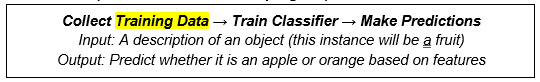

The following recipe script performs the basic process for applying a machine learning algorithm to a dataset. The four steps are:
1. Download a dataset (using pandas)
2. Process the numeric data (using NumPy)
3. Train and evaluate learners (using scikit-learn or TensorFlow)
4. Plot and compare results (using matplotlib)

**Training Data:** Examples of data for the problems worth solving
- Writing a function for this instance of collecting training data
- Training Data is collected by collecting observations, survey data, or measurements called <mark>features</mark>.
- Our training data is used via arrays/lists (aggregator variables)

**Features:** Descriptions and/or characteristics of a certain label that a program can use to determine the classifier’s output
- Tables are a good way to organize this data
- The more data collected, the more accurate the results will be
- Scikit-learn uses real-valued features (integers and floats)


In [15]:
from sklearn import tree

# Training data
# Input, 0 = bumpy, 1 = smooth
features = [[140, 1], [130, 1], [150, 0], [170, 0]]
# Output, 0 = apple, 1 = orange
labels = [0, 0, 1, 1]

**Decision Tree:** 

A type of classifier very similar to a flowchart in which a condition is given and two options are provided as outputs. The decision tree then states what is ran after a given output. A classifier is called through the scikit-learn library.

In [16]:
# Defines type of classifier
clf = tree.DecisionTreeClassifier()

After a classifier is instantiated, a <mark>learning algorithm</mark> is needed for functionality.

**Learning Algorithm:** The procedure that creates the rules for a classifier or “empty box of rules”. These rules are determined by finding patterns in training data

In [17]:
# Defines our Learning Algorithm (fit is for "Finding patterns in Data")
clf = clf.fit(features, labels)

You can then print data with a test input and output a value of 1 as a prediction or inference, and based on the trained decision tree, ouputs its guess!

In [18]:
# Inference
p = clf.predict([[160, 0]])

if p == 0: print("Apple")
elif p == 1: print("Orange")
else: print("Error predicting")

Orange


### Recipe 2: Visualizing a Decision Tree

Determine the specific species of an Iris Flower from the [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

- Types of classifiers include Artificial Neural Networks, Support Vector Machines
- Decision Trees (see recipe 1) are easy to use, understand, and are interpretable. Decision Trees are widely useful since they can be easily understood quickly

**Goals:**
- Import dataset
- Train a classifier
- Predict the label for a new flower not in the data set (important part)
- Visualize the tree

**Our Recipe:**

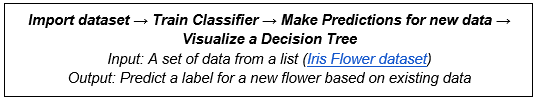

- Metadata: Gives information about the training data. In this case about the features and names of the
flowers

In [19]:
'''
Importing the iris dataset and printing metadata (features and labels from a table)
'''

from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# import iris from sklearn's preloaded datasets
iris = datasets.load_iris()

# print info from set
print(iris.feature_names) # metadata
print(iris.target_names)
print(iris.data[0]) # features
print(iris.target[0]) # labels

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0


Printing the data using a loop can be a quick way to acquire all the data as well.

**Testing Data:** Examples used to “test” the classifier accuracy. This set is NOT part of the training data and simply to test the classifier (Keep these separate)
- "Just like in programming, testing is a very important part of ML"


In [20]:
testIdx = [0, 50, 100]  # each index where a new set of flowers begin

# training data
trainTarget = np.delete(iris.target, testIdx)
trainData = np.delete(iris.data, testIdx, axis=0)

# testing data
testTarget = iris.target[testIdx]
testData = iris.data[testIdx]

- Make sure to import modules! Two sets of variables (training and testing) that remove two items of data and test them
- In this case, the target variables are labels, and the data variables are features of those labels (see recipe 1)
- Next, define a classifier like recipe 1 (train and predict functions) but predict what the testing data is to confirm that the classifier is properly trained

A decision tree is read from top to bottom, with certain conditions being met based on given inputs. Once no more conditions can be met, a decision is made.

In [21]:
# classifier
clf = tree.DecisionTreeClassifier()
clf.fit(trainData, trainTarget)

print(testTarget)  # what our label is expected to be
print(clf.predict(testData))

print(testData[0], testTarget[0])

[0 1 2]
[0 1 2]
[5.1 3.5 1.4 0.2] 0


Choosing good features is one of the most important jobs! Good features allow for the accurate generation of a decision tree and great results.

- How are trees built automatically from examples?
- How well do they work in practice?

### Recipe 3: What Makes a Good Feature?

Difference between Greyhounds and Labradors

**Binary Classification:** Two different features in a training dataset. The easiest form of features since you only need two proficient ones.
- Due to the variation of data in the world, consider the difference of values for each type of feature to determine its effectiveness in a program.
- Features capture different types of information, otherwise if/then logic is all that is needed

**Thought Experiment:** “If you were the classifier trying to predict the label, what else would you need to do so?” The amount of features you would need to solve the problem is the amount you need in your program.
- If a feature is 50-50, or similar results are in both labels, don’t use it, as it can hurt the classifier results

**Independent Features:** Use different types of information (example: height in inches vs height in cm are measuring the same thing)
- Features should be easy to understand, as simpler relationships are easier to learn

In summary, ideal features are **informative, independent, and simple.**

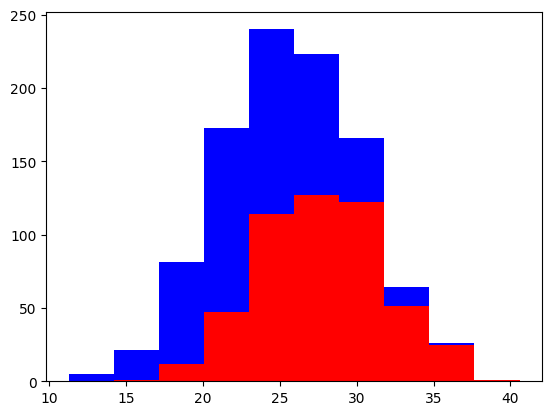

In [22]:
# Example: Is height a good choice for a feature?
import numpy as np
import matplotlib.pyplot as plt

# sample population
greyhounds = 500
labs = 500

# simulate height data
greyHeight = 28 + 4 * np.random.randn(greyhounds) # change to make it realistic for actual data, 
                                                  # but random ints added to increase variation
labHeight = 24 + 4 * np.random.randn(labs)

# Histogram to represent data
plt.hist([greyHeight, labHeight], stacked=True, color=['r', 'b'])
plt.show()

# Does the histogram show enough similarity of heights across both populations? 
# Is there enough difference between the two breeds to classify them?

### Recipe 4: Writing a Pipeline

**Pipeline:** The flow of an ML program, from importing modules, training a classifier, to predicting labels or outputs from data.
- To review, you can use two partitions of data to train and test the classifier:
    - Training Data that includes collected examples of data
    - Testing Data that includes theoretical data that tests the classifier to determine if it has been properly trained

Features and labels can be represented by simple function notation:

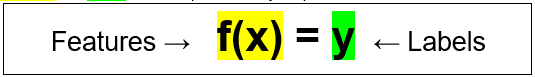

While there are many different types of classifiers, they each have a similar interface. A common way to think of it in Python is:


In [23]:
def classify(features):
    # do some logic based on inputted features i.e. decision tree
    # this body is algorithmically written or "trained", not written
    return "label"

- However, an algorithm is preferred to do it for the developer and become trained.
- The body of the function is written algorithmically or learned. Start with a model instead:

**Model:** The rules that define the body of a function

**Linear Regression:**
Using a line as a classifier:
1.	Graphing a line to represent a classifier, and adding dots on one side or the other (both sides being features)
2.	The parameters of the function determine the classifier

Ex: y = mx+b with m and b that change the line
- Start with one training example and create the classifier from there, then add another and see if the classifier gets it right. If not, try different parameters, but if so, the classifier works.

**"Learning":** Using training data to adjust the parameters of a model

An example of importing some cool Scikit Learn modules and experimenting with classifiers. The following is a K-Nearest Neighbors (KNN) classifier model that will be further explored in recipe 5:

In [24]:
from scipy.spatial import distance

def euc(a, b):
    return distance.euclidean(a, b)  # calculate point distance

# A K-Nearest Neighbors Classifier
class ScrappyKNN():  # Our classifier (Scrappy = bare-bones)
    def fit(self, x_train, y_train):  # takes the features and labels as input
        self.x_train = x_train  # features
        self.y_train = y_train  # labels

    def predict(self, x_test):  # inputs the features from testing data and outputs predictions
        predictions = []  # returning list of predictions
        for row in x_test:
            label = self.closest(row)  # finds closest training point from test point
            predictions.append(label)
        return predictions

    def closest(self, row):  # loops over all of training points and updates to the closest one so far
        bestDist = euc(row, self.x_train[0])  # records best distance from testing point to training point
        bestIndex = 0  # records the best index
        for i in range(len(self.x_train)):
            dist = euc(row, self.x_train[i])
            if dist < bestDist:
                bestDist = dist
                bestIndex = i
        return self.y_train[bestIndex]

from sklearn import datasets

iris = datasets.load_iris()

x = iris.data  # features
y = iris.target  # labels

from sklearn.model_selection import train_test_split

# a built in function that allows for automated train/test splitting of the data.
# features and label values are used, and 'test_size' defines how much of the data is split into train or test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

# from sklearn.neighbors import KNeighborsClassifier # train a new type of classifier
clf = ScrappyKNN()  # sets classifier var to class


def results(prediction):  # converts results to readable strings
    data = prediction
    for i in range(len(data)):
        if predict[i] == 0:
            data[i] = "setosa"
        elif predict[i] == 1:
            data[i] = "versicolor"
        elif predict[i] == 2:
            data[i] = "virginica"
    return data


clf.fit(x_train, y_train)
predict = clf.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predict))

results = results(predict)
print(results)  # this prints the type of iris the classifier predicts for each row of testing data

0.96
['setosa', 'virginica', 'virginica', 'virginica', 'virginica', 'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica', 'setosa', 'virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica', 'setosa']


### Recipe 5: Writing Your Own Classifier

**How a KNN classifier works (KNearestNeighbor):** 

Given training data on a scatter plot, memorized in the “fit function”, predict the label for a given or random point on the plot
- It performs this action by finding the training point closest to the testing point and assumes that the testing point has the same label as the training point (hence, nearest neighbor)
- If the data is equidistant, it is determined by using $k$, or the number of neighboring data to consider (hence, KNN)
    - If $k = 1$, look at the closest training point
    - If $k > 1$, look at $k$ closest training points
    - The majority data points are chosen as the label for the new point


**Writing a Classifier instead of Importing One:**
1.	Comment out imports of any classifier used.
2.  Make sure your accuracy rating on your training data is typically above 90% or a float of 0.90 with one or two features
3.	Implement a Class (see code from recipe 4) 
4. Understand the interface: Add functions based on what functions we needed from the scikit-learn module

In [25]:
'''
Example of a KNN boilerplate class
'''
class MyKNN():
    def fit(self, x_train, y_train): # takes features and labels as input
        pass

    def predict(self, x_test): # input features from testing data and outputs prediction/inference
        pass

    def closest(self, row): # loops over all of training points and updates to the closest one so far
        pass

4.	Get pipeline working: Make sure to have an accuracy rating averaging 33% for this instance due to 3 types of labels in the dataset
5.	Measure distance (find the nearest neighbor): 
- Uses the Euclidean distance formula $d = \sqrt((x2 - x1)^2 + (y2 - y1)^2)$
- With more features adds more terms to the formula (dimensions)
6.	Import nearest neighbor algorithm: 
- Calculate the distance of all training points
- Predict the testing data’s closest neighbor and assign it that label
- The source code that implements Euclidean distance formula and functions for recording the shortest distance:
7.	Run pipeline:
- If accuracy is greater than 90%, KNN classifier is correctly programmed and trained
- Is the KNN algorithm worth it?
    - Pros: Relatively simple
    - Cons: Computationally intensive, Hard to represent relationships between features

### Recipe 6: Train an Image Classifier with *TensorFlow for Poets*

Building a classifier that finds the difference between images

**TensorFlow for Poets:** High-level code, powerful classifier, and open source machine learning library that’s useful for using Deep Learning

**Deep Learning:** No feature engineering is needed, only the feature sources. The classifier is powerful enough to understand the raw differences of features
- When using deep learning, the classifier used is called a <mark>Neural Network</mark>
- A neural network can learn more complex functions and features
    - Input → Hidden Layer → Hidden Layer → Output

**TF Learn:** High-level ML library on top of TensorFlow
- Syntax is similar to scikit-learn
- Formerly known as SK Flow

*MobileNet*: A small efficient convolutional neural network (CNN)
- <mark>Convolutional</mark>: Means that the same calculations are performed at each location in the image.

Instead of training a classifier from scratch, TensorFlow is starting with an existing classifier called Inception: One of Google’s best image classifiers, then uses transfer learning to learn the additional images in the new dataset provided by us as a developer.
- Open source
- Trained on 1.2 million images
- Training took 2 weeks

**Retraining (or Transfer Learning):**
- Saves a lot of time
- Leverages prior work with less training data

To train a good classifier, **use diverse and large amounts of features.**
- Different colors
- Different camera angles (above, to the side)
- Object in foreground and in background of image
- At least several hundred total images

In [27]:
# TODO: Update to TF v2, currently v1 versioned

from sklearn import metrics, cross_validation
import tensorflow as tf
import tensorflow_datasets as tfds

def main(unused_argv):
    # Load dataset
    iris = tfds.load("iris", as_supervised=True, with_info=True)

    x_train, x_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

    # Build 3 layer DNN with 10, 20, 10 units respectively
    # FIXME
    classifier = learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3)

    # Fit and predict
    classifier.fit(x_train, y_train, steps=200)
    score = metrics.accuracy_scrore(y_test, classifier.predict(x_test))
    print("Accuracy: {0:f}".format(score))

ImportError: cannot import name 'cross_validation' from 'sklearn' (f:\Projects\MLFrameworks\venv\Lib\site-packages\sklearn\__init__.py)

### Recipe 7: Classifying Handwritten Digits with TF.Learn

Classifying handwritten digits from the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) and predict a digit given an image

- When working with images, no feature engineering is required and raw pixels are used instead. The classifier does the rest <mark>(# of pixels = # of features)</mark>
- Edges of the data are stacked, as each feature passes through each node, starting with the input node and moving through edges. Each edge has a weight so the feature is multiplied by the weight of each edge and each output node gathers evidence as to which number the feature is.
- The more evidence = the increased chances of that being the correct label

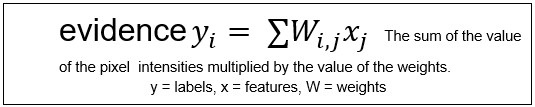

Weights adjusted by <mark>gradient descent</mark>: Setting them properly means more accurate classification
- Begin with random weights
- Gradually adjust to better values
- Accuracy is easily obtained at 99% with Deep Learning
- Weights can be visualized using color to outline the features and how much evidence is being put to the test


In [28]:
# CODE FORKED FROM @TENSORFLOW/TENSORFLOW. DO NOT DISTRIBUTE WITHOUT EDITING.
# TODO: Update to TF v2, currently v1 versioned

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

learn = tf.contrib.learn # TODO: Update to use keras
tf.logging.set_verbosity(tf.logging.ERROR)

# Import the dataset
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]


# Display some digits
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.gray_r)


for i in range(len(data)):
    display(i)

# lists features
print(len(data[0]))

# Fit a Linear Classifier
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

# Evaluate accuracy
results = classifier.evaluate(test_data, test_labels)
print(results, "Accuracy")

predict = classifier.predict((test_data[0]), (test_labels[0]))

# here's one it gets right
print("Predicted %d, Label: %d" % (predict))
display(0)
# one it gets wrong
predict = classifier.predict((test_data[8]), (test_labels[8]))

print("Predicted %d, Label: %d" % (predict))
display(8)

# Let's see if we can reproduce the pictures of the weights in the TensorFlow Basic MNSIT
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(())  # ticks be gone
    a.set_yticks(())
plt.show()

AttributeError: module 'tensorflow' has no attribute 'contrib'

### Recipe 8: Writing a Decision Tree Classifier from Scratch

Create a dataset and build a decision tree model to predict a type of fruit based on features such as color and size.

**Example Training Dataset:**
| Color   | Diameter | Label  |
|---------|----------|--------|
| Green   | 3        | Apple  |
| Yellow  | 3        | Apple  |
| Red     | 1        | Grape  |
| Red     | 1        | Grape  |
| Yellow  | 3        | Lemon  |
| Red     | 3        | Apple  |
| Red     | 3        | Apple  |

Some rows contain the exact same features with different labels to enrich the tree's predicitions.

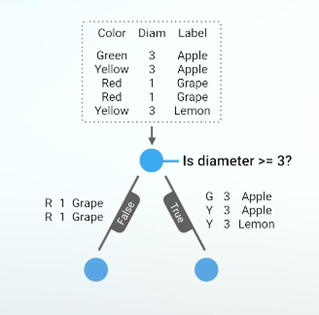

**Decision Tree Learning Algorithms (ID3, C4.5, C5.0, CART):**
- Algos that construct trees by themselves (no manual construction)
- Each give a procedure to “ask which questions, and when?”

**CART: Classification and Regression Trees:**
- A root node (the input at the top) receives the entire training set
- Each node asks a true/false about one of the features
- The data is split into two subsets based on the answer to the question
- Two child nodes are created with the new subsets as input
- The goal is to produce the "purest possible distribution of labels in each node"
- When there are no new questions to ask, a leaf is added to the tree and that leaf is predicted as the correct label

What types of questions can we ask? 
- A question can be thought of based on each feature listen in each row. Each becomes a new category for partitioning the data into subsets

**Gini Impurity (or Entropy):** A quantity measuring the amount of uncertainty at each node to pinpoint the effectiveness of asking each question

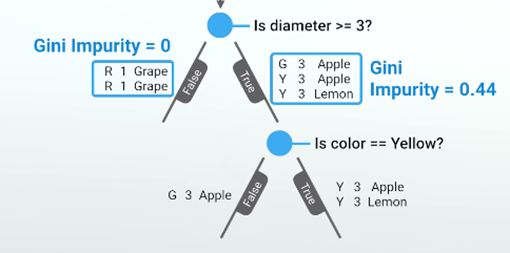

- Chance of being incorrect if you randomly assign a label to an example in the same set
- If no chance of being wrong, then impurity = 0
- Avg Impurity = $\frac{4}{5} * Subset_1 + \frac{1}{5} * Subset_2$

**Information Gain:** How much a question reduces uncertainty. Helps find a question that reduces uncertainty the most

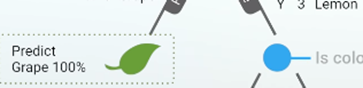

- Information Gain = $0.64 - 0.5 = 0.14$

In [29]:
'''
Build and print the decision tree

Sourced from (Credit to Google Developers): https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb
'''

# For Python 2 / 3 compatability
from __future__ import print_function

# Toy dataset.
# Format: each row is an example.
# The last column is the label.
# The first two columns are features.
training_data = [
    ["Green", 3, "Apple"],
    ["Yellow", 3, "Apple"],
    ["Red", 1, "Grape"],
    ["Red", 1, "Grape"],
    ["Yellow", 3, "Lemon"],
    ["Red", 3, "Apple"],
    ["Red", 3, "Apple"],
]

# print the tree
header = ["color", "diameter", "label"]


# print(header)


def unique_vals(rows, col):
    # Find the unique values for a column in a dataset.
    return set([row[col] for row in rows])


# unique_vals(training_data, 0)
# returns column 0 of training data

def class_counts(rows):
    # Counts the number of each type of example in a dataset.
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts


# class_counts(training_data)
# returns how many times a label is present

def is_numeric(value):
    """Test if a value is numeric. (E.g Distinguish color names from diameter)"""
    return isinstance(value, int) or isinstance(value, float)


# Demo
# is_numeric(7)

# Represents how a question is determined
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        # stores for the threshold used to partition the data
        self.column = column  # string of type of feature
        self.value = value  # value of the given node in the table

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        # print(val) prints the feature at self.column and the given index of training_data
        if is_numeric(val):  # returns boolean values
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))


# Prints example questions
q = Question(0, 'Green')  # Is color == Green?
print(q)
print(Question(1, 3))  # Is diameter >= 3?

# An example from the training set to see if it matches the question
example = training_data[0]
print(q.match(example))  # this will be true, since the first example is Green.


def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:  # If the question is true for the given data, place it in true, otherwise it's false
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


# Partition the training data based on whether rows are Red.
true_rows, false_rows = partition(training_data, Question(0, 'Red'))


# print(true_rows) Contains rows with Red

def gini(rows):
    """Calculate the Gini Impurity for a list of rows.

    There are a few different ways to do this, this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl ** 2
    return impurity


# First, we'll look at a dataset with no mixing.
no_mixing = [['Apple'],
             ['Apple']]
# this will return 0
print(gini(no_mixing))

some_mixing = [['Apple'],
               ['Orange']]
# this will return 0.5 - meaning, there's a 50% chance of misclassifying
# a random example we draw from the dataset.
print(gini(some_mixing))

lots_of_mixing = [['Apple'],
                  ['Orange'],
                  ['Grape'],
                  ['Grapefruit'],
                  ['Blueberry']]
# This will return 0.8
print(gini(lots_of_mixing))


def info_gain(left, right, current_uncertainty):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)


# Calculate the uncertainy of our training data.
current_uncertainty = gini(training_data)
print(current_uncertainty)


def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question


# Find the best question to ask first for our toy dataset.
best_gain, best_question = find_best_split(training_data)
print(best_question)


class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)


class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch


def build_tree(rows):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)


# Recieves the entire training set as input
my_tree = build_tree(training_data)
print(my_tree)


def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)


# training data is an apple with confidence 1.
print(classify(training_data[0], my_tree))


def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs


# Printing that a bit nicer
print(print_leaf(classify(training_data[0], my_tree)))

# Evaluate
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

for row in testing_data:
    print("Actual: %s. Predicted: %s" %
          (row[-1], print_leaf(classify(row, my_tree))))

Is color == Green?
Is diameter >= 3?
True
0.0
0.5
0.7999999999999998
0.5714285714285715
Is diameter >= 3?
{'Apple': 3}
{'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}


### Recipe 9: Intro to Feature Engineering with TensorFlow

Example: Predict income based on attributes about a person using the Census dataset:
- 50k examples
- 6 numeric features
- 9 categorical features

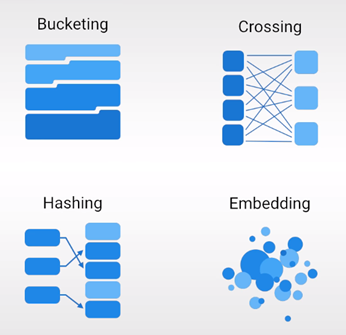

- Numeric Attributes: Sometimes the raw numeric value can be used as a feature, if the relationship is linear
- Bucketing: Transforms a numeric feature into several categories. One categorical feature is created for each bucket.
- Vocabulary: Possible outcomes for a feature
- Categorical Features:
    - Use the raw value only if there are only a small amount of possibilities
- Feature Crossing: Create new features that are combinations of existing ones
- Hashing: Represent a categorical feature with a large vocabulary
    - 1 bit for each possible value in the vocabulary
    - If the vocabulary is unknown, hashes are used to compute the bits
    - Limits memory usage
    - Saves time
- Embeddings:
    - Powerful way to represent large vocabularies
    - Learned automatically
    - Dense vectors vs.  one-hot (sparse)
    - Large vocabulary
    - Concepts (vs specifics)
    - Are dense with concepts
    - Gives the classifier inside knowledge about what features mean

#### Feature Engineering Resources:

- https://projector.tensorflow.org         
- [Code to try out that uses TF methods to sort and improve features](https://www.tensorflow.org/tutorials/load_data/csv)